In [22]:
import numpy as np
import gsd.hoomd

import multiprocessing as mp
import freud
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import sys
import polychrom_hoomd.render as render
plt.rcParams['text.usetex'] = False
from scipy.optimize import curve_fit
from scipy.special import erfc


colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 
    'magenta', 'yellow', 'black', 'lime', 'teal', 'navy'
]

import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')

/tmp/ipykernel_2432274/1331217932.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [34]:
data = {
    "Fast Measure": {
        "Time (s)": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
        "pair1": [0.03182, 0.0471, 0.05686, 0.06527, 0.07142, 0.0762, 0.08059, 0.08527, 0.09012, 0.09243, 0.09511, 0.0984, 0.10278, 0.10703],
        "pair2": [0.02965, 0.04377, 0.05423, 0.06254, 0.06936, 0.07641, 0.07982, 0.08626, 0.09246, 0.09778, 0.10352, 0.11013, 0.11442, 0.11279],
        "pair3": [0.0262, 0.03877, 0.04788, 0.05651, 0.06297, 0.0696, 0.07518, 0.07971, 0.08519, 0.08878, 0.09411, 0.09855, 0.10045, 0.10447],
        "pair4": [0.02981, 0.04327, 0.05457, 0.06292, 0.07014, 0.07807, 0.08436, 0.09091, 0.09544, 0.10263, 0.10458, 0.10617, 0.10617, 0.1068],
        "pair5": [0.03624, 0.05242, 0.06484, 0.0764, 0.08493, 0.09501, 0.10313, 0.1111, 0.11819, 0.12428, 0.13048, 0.13794, 0.14645, 0.15473],
        "pair6": [0.03476, 0.04998, 0.06277, 0.07393, 0.08304, 0.09151, 0.09776, 0.1053, 0.11156, 0.12163, 0.12576, 0.13218, 0.13743, 0.14397]
    },
    "Slow Measure": {
        "Time (s)": [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200, 1320, 1440, 1560, 1680, 1800, 1920, 2040, 2160, 2280],
        "pair1": [0.09595, 0.12041, 0.13414, 0.14349, 0.15206, 0.15622, 0.15915, 0.16183, 0.16757, 0.17361, 0.17603, 0.17827, 0.179, 0.17961, 0.17733, 0.17528, 0.17898, 0.19239, 0.19719],
        "pair2": [0.10516, 0.1392, 0.16371, 0.18088, 0.19364, 0.20289, 0.20914, 0.21758, 0.2204, 0.22204, 0.22369, 0.22427, 0.22825, 0.23252, 0.23477, 0.2335, 0.22923, 0.24124, 0.24035],
        "pair3": [0.09583, 0.13524, 0.16394, 0.18803, 0.20619, 0.22366, 0.23905, 0.25228, 0.26339, 0.27376, 0.28209, 0.28706, 0.29641, 0.30481, 0.30688, 0.31596, 0.32263, 0.32082, 0.32657],
        "pair4": [0.10991, 0.14716, 0.17292, 0.19021, 0.20502, 0.21294, 0.21905, 0.22881, 0.2345, 0.23857, 0.24225, 0.24641, 0.25129, 0.25458, 0.2521, 0.25476, 0.25676, 0.26474, 0.26573],
        "pair5": [0.12507, 0.17385, 0.20676, 0.2295, 0.24682, 0.26112, 0.27085, 0.274, 0.27579, 0.27903, 0.28434, 0.28587, 0.29006, 0.29614, 0.30761, 0.31787, 0.30886, 0.30439, 0.31163],
        "pair6": [0.13228, 0.18867, 0.22502, 0.25141, 0.26529, 0.27851, 0.28751, 0.29306, 0.30656, 0.30561, 0.31586, 0.31768, 0.31876, 0.32557, 0.31075, 0.31633, 0.32968, 0.36894, 0.3599]
    },
    "Separation and Distance": {
        "pair1": {"Separation (kb)": 179, "Distance (um)": 0.56478, "Distance SE": 0.01086},
        "pair2": {"Separation (kb)": 360, "Distance (um)": 0.6871, "Distance SE": 0.01326},
        "pair3": {"Separation (kb)": 542, "Distance (um)": 0.77569, "Distance SE": 0.00832},
        "pair4": {"Separation (kb)": 363, "Distance (um)": 0.64189, "Distance SE": 0.00994},
        "pair5": {"Separation (kb)": 473, "Distance (um)": 0.69418, "Distance SE": 0.01241},
        "pair6": {"Separation (kb)": 543, "Distance (um)": 0.7352, "Distance SE": 0.0145}
    }
}
merged_data = {
    "Time (s)": np.concatenate((data["Fast Measure"]["Time (s)"], data["Slow Measure"]["Time (s)"])),
    "pair1": np.concatenate((data["Fast Measure"]["pair1"], data["Slow Measure"]["pair1"])),
    "pair2": np.concatenate((data["Fast Measure"]["pair2"], data["Slow Measure"]["pair2"])),
    "pair3": np.concatenate((data["Fast Measure"]["pair3"], data["Slow Measure"]["pair3"])),
    "pair4": np.concatenate((data["Fast Measure"]["pair4"], data["Slow Measure"]["pair4"])),
    "pair5": np.concatenate((data["Fast Measure"]["pair5"], data["Slow Measure"]["pair5"])),
    "pair6": np.concatenate((data["Fast Measure"]["pair6"], data["Slow Measure"]["pair6"]))
}
sorted_indices = np.argsort(merged_data["Time (s)"])
merged_data["Time (s)"] = merged_data["Time (s)"][sorted_indices]
for pair in ["pair1", "pair2", "pair3", "pair4", "pair5", "pair6"]:
    merged_data[pair] = merged_data[pair][sorted_indices]

In [35]:
def M2(t, Gamma2, tau, J):
    return 2 * Gamma2 * np.sqrt(t) * (1 - np.exp(-tau / (np.pi * t))) + 2 * J * erfc(np.sqrt(tau / (np.pi * t)))

Pair 3: Gamma2 = 0.004386109827767651, tau = 3436.9300512541186, J = 0.2571388416217454
Pair 3: Gamma2 = 0.005514115354577896, tau = 635.4198735308613, J = 0.2076137915109413


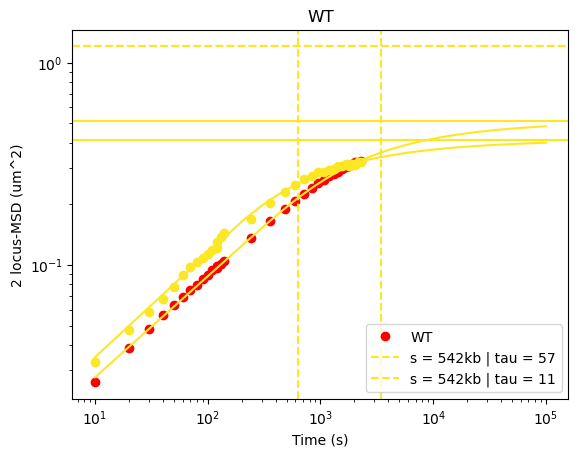

In [82]:

for k in [3]:
    separation = data["Separation and Distance"][f"pair{k}"]["Separation (kb)"]
    dist = data["Separation and Distance"][f"pair{k}"]["Distance (um)"]
    color = cmap(separation/500)

    x = merged_data["Time (s)"]
    y = merged_data[f"pair{k}"]

    popt, pcov = curve_fit(M2, x,y , p0=[0.01, 1.0, 1.0])
    Gamma2_fit, tau_fit, J_fit = popt
    print(f"Pair {k}: Gamma2 = {Gamma2_fit}, tau = {tau_fit}, J = {J_fit}")
    merged_data[f"pair{k}_fit"] = popt

    plt.loglog(x, y, 'o', color = 'red', label = 'WT')
    x = np.linspace(10, 100000, 1000)
    plt.plot(x, M2(x, *popt), '-', color = color)
    plt.axhline(y = 2*J_fit, color = color)
    plt.axvline(x = tau_fit, color = color, linestyle = '--')
    plt.axhline(y = 2*data["Separation and Distance"][f"pair{k}"]["Distance (um)"]**2, color = color, linestyle = '--', label=f's = {separation}kb | tau = {round(tau_fit/60)}')
    plt.legend()
    plt.ylabel('2 locus-MSD (um^2)')
    plt.xlabel('Time (s)')
    plt.title('WT')

    separation = data["Separation and Distance"][f"pair{k}"]["Separation (kb)"]
    dist = data["Separation and Distance"][f"pair{k}"]["Distance (um)"]
    color = cmap(separation/500)

    x = df_combined["Time (s)"]
    y = df_combined[f"pair{k}"]

    popt, pcov = curve_fit(M2, x,y , p0=[0.01, 1.0, 1.0])
    Gamma2_fit, tau_fit, J_fit = popt
    print(f"Pair {k}: Gamma2 = {Gamma2_fit}, tau = {tau_fit}, J = {J_fit}")
    merged_data[f"pair{k}_fit"] = popt

    plt.loglog(x, y, 'o', color = color)
    x = np.linspace(10, 100000, 1000)
    plt.plot(x, M2(x, *popt), '-', color = color)
    plt.axhline(y = 2*J_fit, color = color)
    plt.axvline(x = tau_fit, color = color, linestyle = '--')
    plt.axhline(y = 2*data["Separation and Distance"][f"pair{k}"]["Distance (um)"]**2, color = color, linestyle = '--', label=f's = {separation}kb | tau = {round(tau_fit/60)}')
    plt.legend()
    plt.ylabel('2 locus-MSD (um^2)')
    plt.xlabel('Time (s)')
    plt.title('WT')



In [54]:
for k in range(1, 7):
    print(data["Separation and Distance"][f"pair{k}"]["Separation (kb)"], merged_data[f'pair{k}_fit'])

179 [4.79420495e-03 5.04660535e+02 1.07701832e-01]
360 [4.83972338e-03 5.67203620e+02 1.48791813e-01]
542 [4.38610983e-03 3.43693005e+03 2.57138842e-01]
363 [4.93876297e-03 1.03448004e+03 1.70006540e-01]
473 [6.13274972e-03 6.87489139e+02 1.94839374e-01]
543 [5.69664542e-03 5.70226896e+02 2.17907960e-01]


In [63]:
import pandas as pd

# Original data
data_fast = {
    'Time (s)': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'pair3': [0.03288, 0.04769, 0.05815, 0.06757, 0.07741, 0.08852, 0.09734, 0.10293, 0.10765, 0.11325, 0.11799, 0.12895, 0.13702, 0.14414],
    'pair4': [0.02358, 0.03621, 0.04439, 0.05216, 0.05836, 0.06465, 0.07066, 0.07548, 0.07976, 0.08550, 0.09286, 0.10003, 0.10570, 0.10946],
    'pair5': [0.03086, 0.04447, 0.05535, 0.06252, 0.06976, 0.07814, 0.08903, 0.09480, 0.10322, 0.11251, 0.11996, 0.12741, 0.13313, 0.14959]
}

# New data
data_slow = {
    'Time (s)': [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200, 1320, 1440, 1560, 1680, 1800, 1920, 2040, 2160, 2280],
    'pair3': [0.12118, 0.16771, 0.20292, 0.22883, 0.24692, 0.26436, 0.27571, 0.28613, 0.28919, 0.29568, 0.29858, 0.30634, 0.30732, 0.31531, 0.30775, 0.31572, 0.31039, 0.32177, 0.32106],
    'pair4': [0.09338, 0.13227, 0.1614, 0.19022, 0.2064, 0.21476, 0.22589, 0.22945, 0.2322, 0.24442, 0.25265, 0.24753, 0.26006, 0.26899, 0.27846, 0.27422, 0.28913, 0.29179, 0.27286],
    'pair5': [0.11452, 0.16021, 0.19022, 0.21025, 0.23116, 0.23513, 0.24556, 0.25092, 0.25192, 0.26529, 0.26811, 0.27296, 0.27543, 0.27999, 0.2843, 0.28776, 0.29307, 0.29167, 0.31842]
}

# Create DataFrames
df_fast = pd.DataFrame(data_fast)
df_slow = pd.DataFrame(data_slow)

# Combine DataFrames
df_combined = pd.concat([df_fast, df_slow], ignore_index=True)


Pair 3: Gamma2 = 0.005514115354577896, tau = 635.4198735308613, J = 0.2076137915109413
Pair 4: Gamma2 = 0.004308639596725597, tau = 1178.5007397855734, J = 0.19518295195088345
Pair 5: Gamma2 = 0.005330543791223511, tau = 635.900937228684, J = 0.1864277910784346


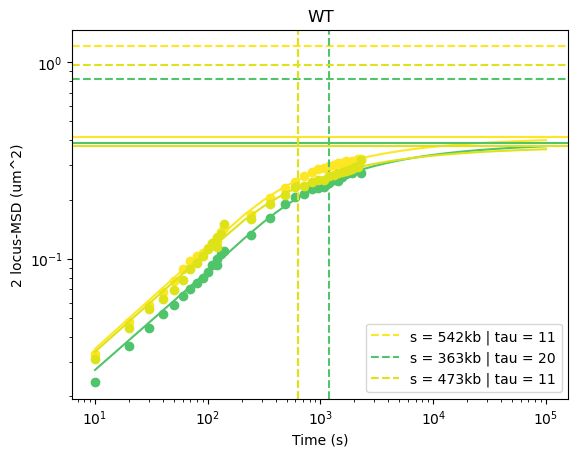

In [65]:

for k in [3, 4, 5]:
    separation = data["Separation and Distance"][f"pair{k}"]["Separation (kb)"]
    dist = data["Separation and Distance"][f"pair{k}"]["Distance (um)"]
    color = cmap(separation/500)

    x = df_combined["Time (s)"]
    y = df_combined[f"pair{k}"]

    popt, pcov = curve_fit(M2, x,y , p0=[0.01, 1.0, 1.0])
    Gamma2_fit, tau_fit, J_fit = popt
    print(f"Pair {k}: Gamma2 = {Gamma2_fit}, tau = {tau_fit}, J = {J_fit}")
    merged_data[f"pair{k}_fit"] = popt

    plt.loglog(x, y, 'o', color = color)
    x = np.linspace(10, 100000, 1000)
    plt.plot(x, M2(x, *popt), '-', color = color)
    plt.axhline(y = 2*J_fit, color = color)
    plt.axvline(x = tau_fit, color = color, linestyle = '--')
    plt.axhline(y = 2*data["Separation and Distance"][f"pair{k}"]["Distance (um)"]**2, color = color, linestyle = '--', label=f's = {separation}kb | tau = {round(tau_fit/60)}')
    plt.legend()
    plt.ylabel('2 locus-MSD (um^2)')
    plt.xlabel('Time (s)')
    plt.title('WT')
